<a href="https://colab.research.google.com/github/oxanaRC/CE888/blob/master/LAB2/LAB2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np

In [26]:

# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]
#---my code-----------------------
print(data)
x1=np.random.choice(data,50, replace=True)
x2=np.reshape(x1,(10,5))
print(x2)
mx=[]
for i in range(10):
  b1=x2[i,:]
  m1=np.mean(b1)
  mx=np.append(mx,m1)
print(mx)
mx2=np.percentile(mx,2.5)
mx3=np.percentile(mx, 97.5)
print(mx2)
print(mx3)
#----end of my code--------------------------------

[ 2.  8. 20. 13.  5.  9. 10.  8. 22. 10.  2.  4.  7.  9.]
[[ 2.  9. 13.  9. 22.]
 [ 7.  8.  5.  2. 22.]
 [ 8.  4.  7. 20.  2.]
 [22. 10. 22.  8.  2.]
 [ 7.  5. 20. 20.  8.]
 [13.  9.  8.  9.  2.]
 [ 7. 22.  5.  7.  8.]
 [22. 10.  8. 22. 22.]
 [10. 13. 22.  4. 13.]
 [20.  2.  4.  4. 13.]]
[11.   8.8  8.2 12.8 12.   8.2  9.8 16.8 12.4  8.6]
8.2
15.900000000000002


In [0]:

# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Create an array of samples of shape (n_iterations, sample_size)
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. In each iteration:
# 3.1 Get the data corresponding to that iteration (new_samples[iteration, :])
# 3.2 Calculate the mean of the iteration data and store it
# (At this point you should have an array of n_iterations values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def boostrap_mean(sample, sample_size, n_iterations):
  #<----my code------------------->
  numnEl=sample_size * n_iterations
  samplesArray=np.random.choice(sample,(n_iterations, sample_size), replace=True)
  #samplesArray=np.reshape(xArray,(n_iterations,sample_size))
  data_mean=np.mean(samplesArray)
  myMeans=[]
  for i in range (n_iterations):
    abc=samplesArray[i,:]
    m=np.mean(abc)
    myMeans=np.append(myMeans,m)   
  lower=np.percentile(myMeans,2.5)  
  upper=np.percentile(myMeans,97.5)
	# <---end of my code--->
  return data_mean, lower, upper

(0, 10000)

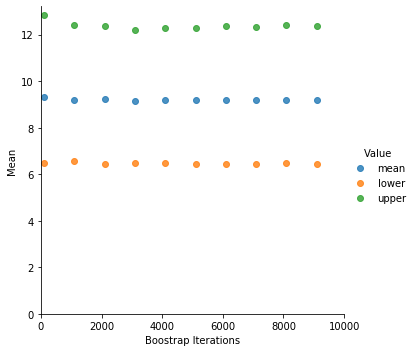

In [48]:
# Call your bootstrap function and plot the results

boots = []
#for i in range(100, 100000, 1000):
for i in range(100,10000,1000):
    boot = boostrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
#sns_plot.axes[0, 0].set_xlim(0, 100000)
sns_plot.axes[0, 0].set_xlim(0, 10000)

#sns_plot.savefig("bootstrap_confidence.png", bbox_inches='tight')
#sns_plot.savefig("bootstrap_confidence.pdf", bbox_inches='tight')

Now, modify the bootstrap function so that you can pass your desired confidence interval as a parameter.

In [0]:

def boostrap_mean_ci(sample, sample_size, iterations, ci):
  #<----my code------------------->
  numnEl=sample_size * iterations
  xArray=np.random.choice(sample,numnEl, replace=True)
  samplesArray=np.reshape(xArray,(iterations,sample_size))
  data_mean=np.mean(samplesArray)
  myMeans=[]
  for i in range (iterations):
    abc=samplesArray[i,:]
    m=np.mean(abc)
    myMeans=np.append(myMeans,m)  
  par1=(100-ci)/2   
  lower=np.percentile(myMeans,par1)  
  upper=np.percentile(myMeans,(ci+par1))
	# <---end of my code--->
  return data_mean, lower, upper

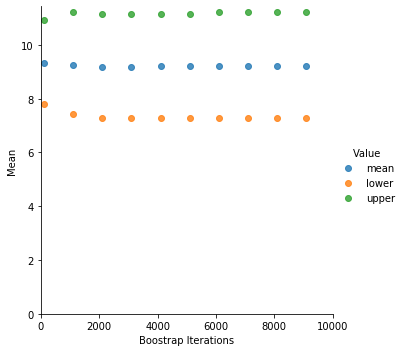

In [50]:

boots = []
#for i in range(100, 100000, 1000):
for i in range(100, 10000, 1000):  
    boot = boostrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 10000)
#sns_plot.axes[0, 0].set_xlim(0, 100000)

sns_plot.savefig("bootstrap_confidence_80.png", bbox_inches='tight')
sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


Vehicles dataset¶
Now let's work on a different dataset. Load the vehicles.csv file and check the Moodle page for instructions on how to proceed

In [63]:
# Load and visualise the vehicles dataset
# <---INSERT YOUR CODE HERE--->
dfv = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
dfv_c= dfv.values.T[0]
print(dfv_c)
print("---")
dfv_n=dfv.values.T[1]
dfv_n = dfv_n[np.logical_not(np.isnan(dfv_n))]
print(dfv_n)
# Note: you can add more cells as needed to organise your code and your plots

[18. 15. 18. 16. 17. 15. 14. 14. 14. 15. 15. 14. 15. 14. 22. 18. 21. 21.
 10. 10. 11.  9. 28. 25. 19. 16. 17. 19. 18. 14. 14. 14. 14. 12. 13. 13.
 18. 22. 19. 18. 23. 26. 25. 20. 21. 13. 14. 15. 14. 17. 11. 13. 12. 13.
 15. 13. 13. 14. 22. 28. 13. 14. 13. 14. 15. 12. 13. 13. 14. 13. 12. 13.
 18. 16. 18. 18. 23. 11. 12. 13. 12. 18. 21. 19. 21. 15. 16. 15. 11. 20.
 21. 19. 15. 26. 25. 16. 16. 18. 16. 13. 14. 14. 14. 28. 19. 18. 15. 15.
 16. 15. 16. 14. 17. 16. 15. 18. 21. 20. 13. 23. 20. 23. 18. 19. 25. 26.
 18. 16. 16. 15. 22. 22. 24. 23. 29. 25. 20. 18. 19. 18. 27. 13. 17. 13.
 13. 13. 30. 26. 18. 17. 16. 15. 18. 21. 19. 19. 16. 16. 16. 16. 25. 26.
 31. 34. 36. 20. 19. 20. 19. 21. 20. 25. 21. 19. 21. 21. 19. 18. 19. 18.
 18. 18. 30. 31. 23. 24. 22. 20. 22. 20. 21. 17. 18. 17. 18. 17. 16. 19.
 19. 36. 27. 23. 24. 34. 35. 28. 29. 27. 34. 32. 28. 26. 24. 19. 28. 24.
 27. 27. 26. 24. 30. 39. 35. 34. 30. 22. 27. 20. 18. 28. 27. 34. 31. 29.
 27. 24. 23. 38. 36. 25. 38. 26. 22. 36. 27. 27. 32

In [0]:

# Compare the two fleets.
# You can create a permutation test function to do this. Check the lecture notes!


